# PHASE 2 PROJECT
**Presented by:** Group 4.4
***

## Dennis Mwanzia 
## Pamela Awino 
## Ian Macharia
## Samuel Igecha
## Pauline Njeri

# 1.0  Project Introduction and Overview

The aim of this project is to put into practice our newly aqcuired skills in data science to formulate and solve a real business problem. In this project, we are given a raw dataset which is the house sales prices in Northwestern County and we are supposed to formulate a real business case study and use the data to solve the business problem and provide a useful business advisory which can be used to formulate real and valuable business decisions. Unlike in phase 1, we are not given the business problem, its upon us to formulate it.

## 1.1 Data Understanding

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use('seaborn')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr

import pickle
import json

#import folium 
#from folium import plugins
#from folium.plugins import HeatMap


from my_functions import clean_data, round_bathrooms, remove_outliers, x_coord, fit_simple_linear_reg, fit_multiple_linear_reg, calculate_rmse, fit_polynomial_reg


We have been provided with King County House Sales dataset found in 'kc_house_data.csv'. There is a description of columns dataset found in the md folder 'column_names.md'. Therefore, we examine the column descriptions to understand their meaning.

In [2]:
#Unpacking the description 
with open('data/column_names.md', 'r') as f:
    md_text = f.read()

print(md_text)

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type

In this problem, we have been given a dataset that contains the following variables;
1. id - unique identified for a house
2. dateDate - house was sold
3. pricePrice - is prediction target
4. bedroomsNumber - of Bedrooms/House
5. bathroomsNumber - of bathrooms/bedrooms
6. sqft_livingsquare - footage of the home
7. sqft_lotsquare - footage of the lot
8. floorsTotal - floors (levels) in house
9. waterfront - House which has a view to a waterfront
10. view - Has been viewed
11. condition - How good the condition is ( Overall )
12. grade - overall grade given to the housing unit, based on King County grading system
13. sqft_above - square footage of house apart from basement
14. sqft_basement - square footage of the basement
15. yr_built - Built Year
16. yr_renovated - Year when house was renovated
17. zipcode - zip
18. lat - Latitude coordinate
19. long - Longitude coordinate
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Business Understanding

## Business Problem

The business problem is to provide guidance to Kings Wajenzi Developers, a prospective real estate developer in King County, on the most profitable types of properties to target in the current market. The guidance will include recommendations on optimal locations, features, and time of year when homeowners are most likely to purchase properties. Our objective as junior data analysts at a Real Estate Agency is to analyze house sales data in King County and leverage the insights generated to guide the developer in selecting the most profitable properties to develop and maximize their profits. With King County's population on the rise and income stabilizing after the COVID-19 pandemic, demand for new homes in the area is at an all-time high.

## 1.2 Objectives

1. Does the time of the year affect the price of an house? If yes, which seasons/Months are most profitable?
2. Does Location affect prices? If yes, which locations within King county attract highest price of houses?
3. Which features/Attributes have the highest impact on sales price of houses/properties? Which features should the developer focus on when developing their upcoming projects in King County?


## Aproach

This project follows the OCEMiN Data Science framework for data analysis
1.	Obtain/import data
2.	Clean/ Scrub data
3.	Explore data/EDA
4.	Model/Develop the predictive Model
5.	Interpret Data


# 2.0 Data Exploration

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.shape

(21597, 21)

The dataset has 21597 rows and 21 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The whole dataset is stored as pandas dataframe. We have three types of datatypes for columns which are integers, floats and objects. Since we are interested in running a linear regression model, we would like all the columns, to be numeric datatypes. However, some columns like date, waterfront, view, condition, grade, sqft_basement are objects and most likely categorical variables and will need to be transformed to dummy variables using one-hote encoding function of python. Intergers will also need to be examined to determine if they are binary variables or numeric data types. 
Its very important to note that sqft_basement should be of value type float so we will need to investigate that column.
Date column need to be transformed to date and year columns.

## 3.0 Data Cleaning

In [6]:
#Checking for how many missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront, view and year renovated have missing values. Lets check the percentage of missing values in the dataset.b

In [7]:
# Get percentage of missing values
for col in ['waterfront', 'view', 'yr_renovated']:
    percent_missing = df[col].isnull().sum() * 100 / len(df)
    print(f"{col}:{round(percent_missing,2)}")

waterfront:11.0
view:0.29
yr_renovated:17.79


Waterfront, view and year renovated have 11.0%, 0.29%, and 17.79% respectively of missing data. Waterfront, and view are objects and therefore, we can replace the missing values with the mode while yr_renovated is a integer and hence we will replace the missing values with zeros. This is because we assumed that for any missing values, there was no renovation that was undertaken for that specific unit. 

In [8]:
print (df['waterfront'].mode())
print (df['view'].mode())

0    NO
Name: waterfront, dtype: object
0    NONE
Name: view, dtype: object


In [9]:
# Investigate sqft_basement column
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [10]:
# Get summary statistics for sqft_basement
df['sqft_basement'].describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

There is a significant number of entries with ? as value for sqft_basement. Moreover, more than half of entries have a value of 0 indicating there is no basement. We will replace the placeholder with 0. 

In [11]:
df=clean_data(df)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,month_sold,year_sold,age,renovated
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,0,...,1180,0.0,0.0,98178,47.5112,-122.257,10,2014,60,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,0,...,2170,400.0,1991.0,98125,47.7210,-122.319,12,2014,64,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,0,...,770,0.0,0.0,98028,47.7379,-122.233,2,2015,82,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,0,...,1050,910.0,0.0,98136,47.5208,-122.393,12,2014,50,0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,0,...,1680,0.0,0.0,98074,47.6168,-122.045,2,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,0,...,1530,0.0,0.0,98103,47.6993,-122.346,5,2014,6,0
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,0,...,2310,0.0,0.0,98146,47.5107,-122.362,2,2015,1,1
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,0,...,1020,0.0,0.0,98144,47.5944,-122.299,6,2014,6,0
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,0,...,1600,0.0,0.0,98027,47.5345,-122.069,1,2015,11,0


In [12]:
# check if all missing values have been resolved
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_renovated     0
zipcode          0
lat              0
long             0
month_sold       0
year_sold        0
age              0
renovated        0
dtype: int64

We nolonger have any missing values, therefore we proceed to check for duplicates.

In [13]:
#checking for duplicates
#duplicates = df[df.duplicated()]
df.duplicated().sum()
#print(len(duplicates))

0

We dont have any duplicates and therefore we can proceed to investigate the integer and object data types and perform the necessary transformations for our multiple regression model.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  month_sold     21597 non-null  int64  
 18  year_s

Bathrooms appear as float and we would expected bathrooms to be integers, so we will investigate the bathrooms column. 

In [15]:
# Summary statistics for bathroom variable
df['bathrooms'].describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [16]:
# Get unique values
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [17]:
# Apply function to df
df = round_bathrooms(df)

In [18]:
# check changes have been applied
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,month_sold,year_sold,age,renovated
0,10/13/2014,221900.0,3,1,1180,5650,1.0,0,0,0,...,1180,0.0,0.0,98178,47.5112,-122.257,10,2014,60,0
1,12/9/2014,538000.0,3,2,2570,7242,2.0,0,0,0,...,2170,400.0,1991.0,98125,47.7210,-122.319,12,2014,64,0
2,2/25/2015,180000.0,2,1,770,10000,1.0,0,0,0,...,770,0.0,0.0,98028,47.7379,-122.233,2,2015,82,0
3,12/9/2014,604000.0,4,3,1960,5000,1.0,0,0,0,...,1050,910.0,0.0,98136,47.5208,-122.393,12,2014,50,0
4,2/18/2015,510000.0,3,2,1680,8080,1.0,0,0,0,...,1680,0.0,0.0,98074,47.6168,-122.045,2,2015,28,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  int64  
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  month_sold     21597 non-null  int64  
 18  year_s

All data types now appear correct. 

### Checking for Outliers

### Boxplots

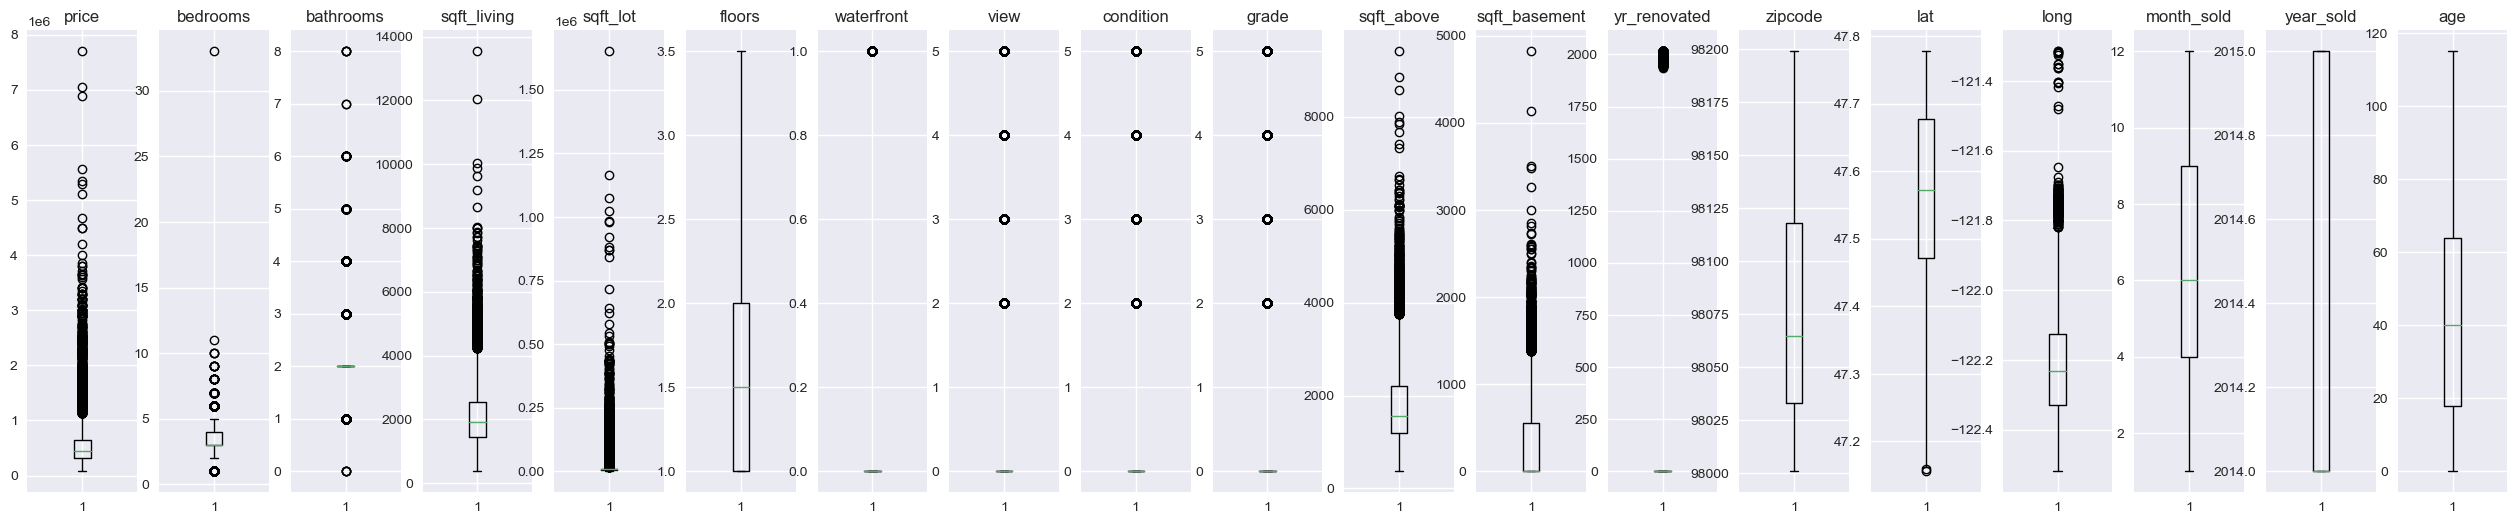

In [20]:
# Select the variables you want to plot
cols_to_plot = df.select_dtypes(include=['int64', 'float64']).columns

# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(32, 6))

# Create a boxplot for each variable in a separate subplot
for i, col in enumerate(cols_to_plot):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

plt.show()


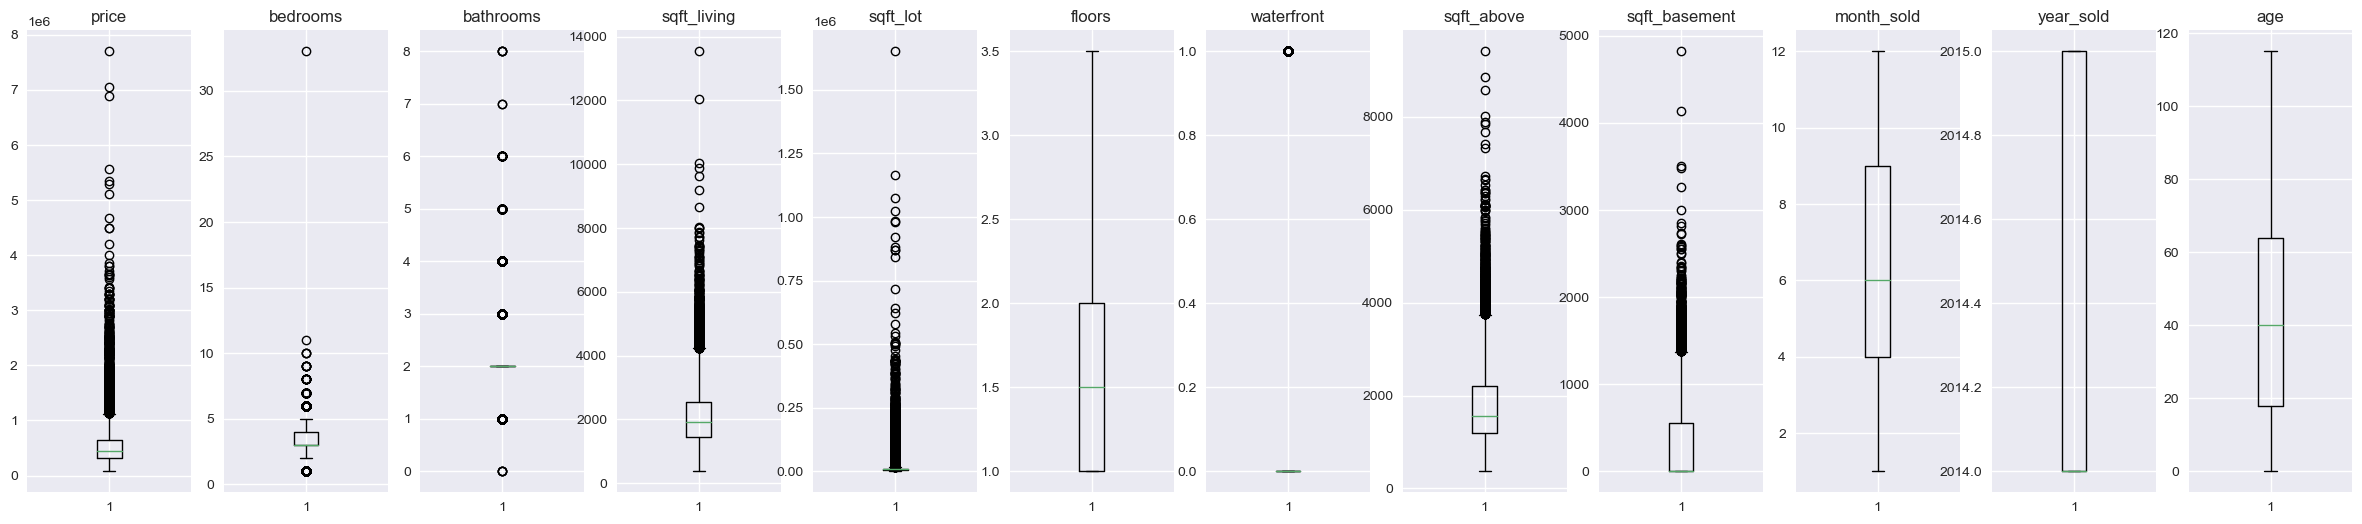

In [21]:
# Drop the irrelant columns for box plot purposes

# Select the categorical variables to drop and then generate boxplots
cols_to_plot = df.select_dtypes(include=['int64', 'float64']).columns.drop(['view', 'grade', 'yr_renovated','condition', 'zipcode','lat','long'])

# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(30, 6))

# Create a boxplot for each variable in a separate subplot
for i, col in enumerate(cols_to_plot):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

plt.show()


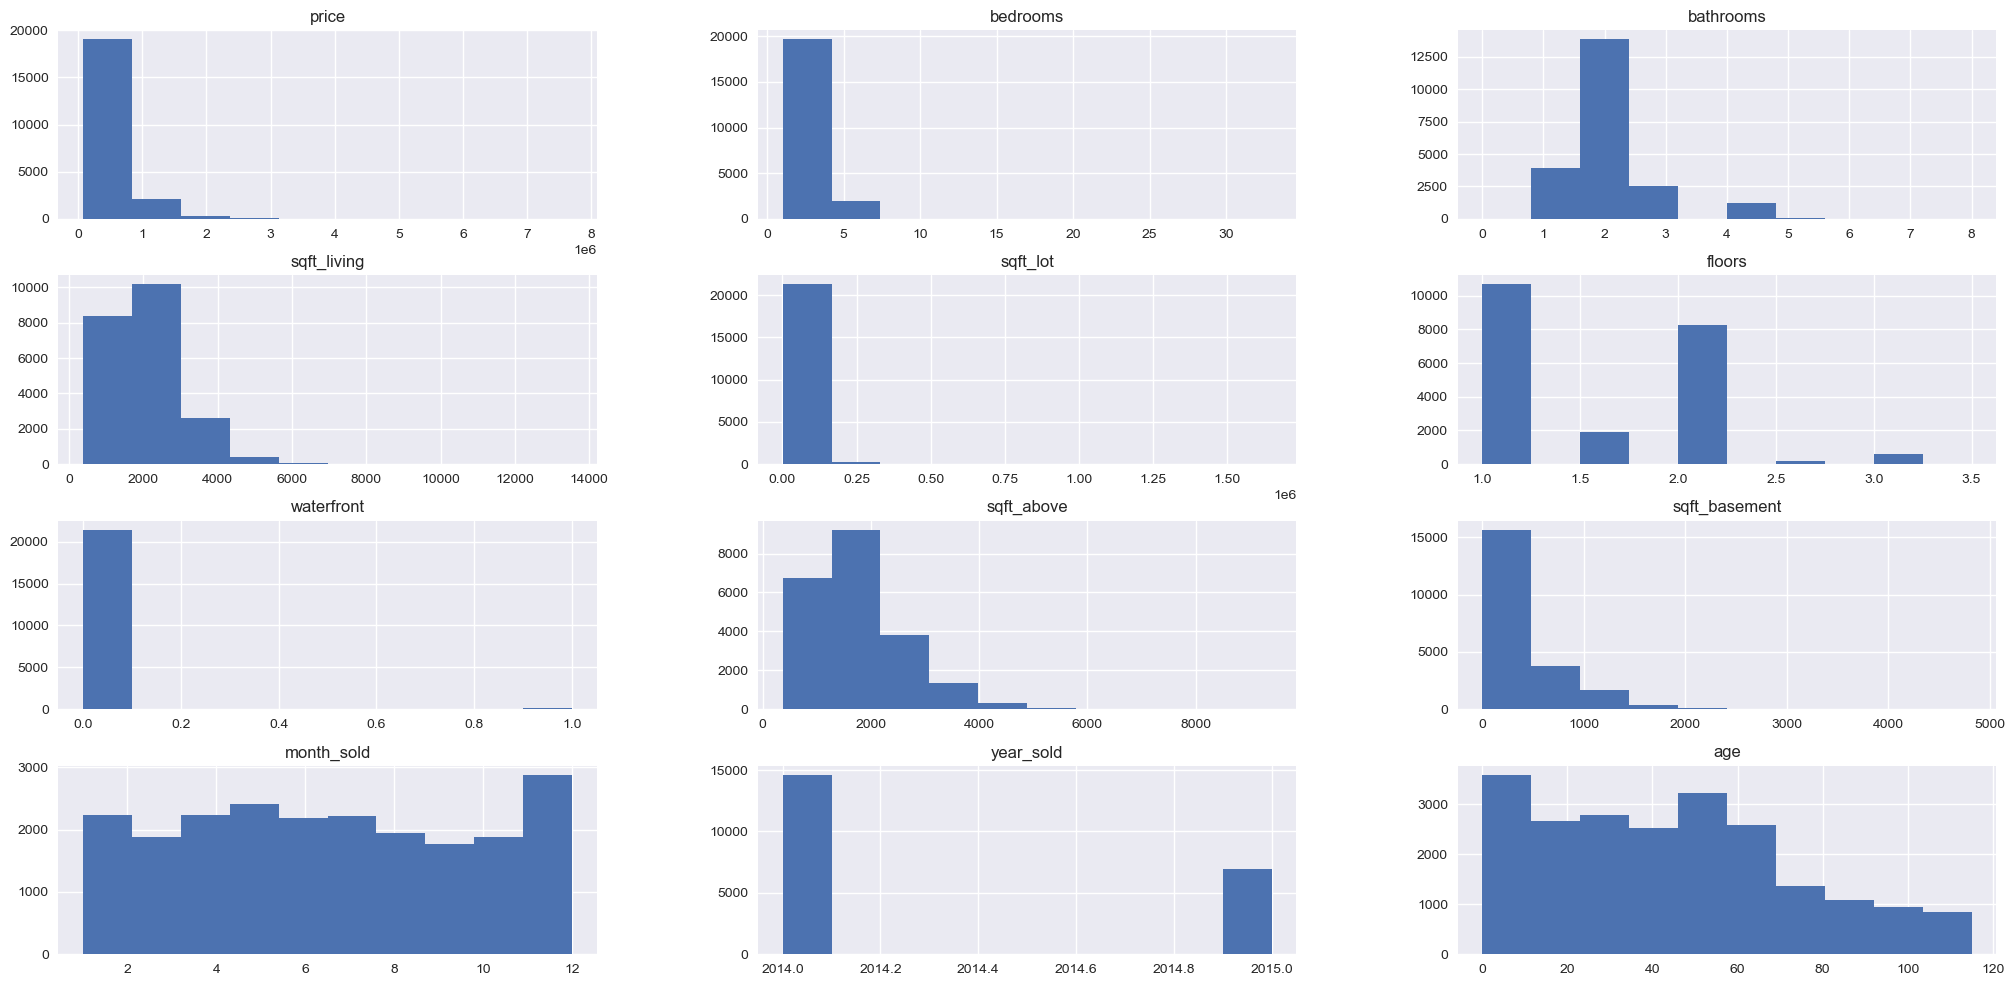

In [22]:
# Histogram plots for each data
# Select the numerical variables you want to plot
num_cols_to_plot = df.select_dtypes(include=['int64', 'float64']).columns.drop(['view', 'grade', 'yr_renovated','condition', 'zipcode','lat','long'])

# Create a histogram for each variable
df[num_cols_to_plot].hist(figsize=(25, 12))
plt.show()


We dropped 'view', 'grade', 'yr_renovated','condition', 'zipcode','lat','long' because they are either binary or geo variables and therefore cannot be reasonably visualized using either box plots or histograms. Floors, age, year_Sold, month_sold have normal distribution with no potential outliers. Waterfront is a binary variable.
Therefore, we consider potential outliers in bedrooms, bathrooms, sqft_living, sqft_lot, floors and sqft_above features.

In [23]:
# Investigate bedrooms
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [24]:
#The houses with 33, 11 and 10 bedrooms need to be examined.
# Select the houses with 33, 11 and 10 bedrooms
bedroom_counts = [33, 11, 10]
houses_to_examine = df[df['bedrooms'].isin(bedroom_counts)]

# Print the selected houses
print(houses_to_examine)


             date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
8748    8/21/2014   520000.0        11          3         3000      4960   
13301   8/14/2014  1150000.0        10          5         4590     10920   
15147  10/29/2014   650000.0        10          2         3610     11914   
15856   6/25/2014   640000.0        33          2         1620      6000   
19239  12/29/2014   660000.0        10          3         2920      3745   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
8748      2.0           0     0          0  ...        2400          600.0   
13301     1.0           0     3          3  ...        2500         2090.0   
15147     2.0           0     0          0  ...        3010          600.0   
15856     1.0           0     0          0  ...        1040          580.0   
19239     2.0           0     0          0  ...        1860         1060.0   

       yr_renovated  zipcode      lat     long  month_sold  year_sold  age

From the above output, houses with 10 and 11 bedrooms appear likely to be okay based on their prices, number of bathrooms, and sqft_living. However, the 33 bedroom house has 2 bathrooms and a sale price of $640000 and it must have been a 3 bedroom house recorded as 33. Therefore, we will replace 33 with 3 bedrooms. 

In [25]:
df.loc[15856, 'bedrooms'] = 3

To remove other outliers we use the statistical method, of z-value where any data with a z-score > |3| will be removed.


In [26]:
# Apply function to df
df = remove_outliers(df)

In [27]:
#Ian & Pamela Work on Divide price into high , medium, low 
# Visualize for us prices vs features 
# Pauline Work on the code to ensure its running for all of us
# Pamela 

In [28]:
# we want to Group price into three cartegories 
# Define the percentile values for each category
price = df['price']
high_percentile = np.percentile(price, 75)
low_percentile = np.percentile(price, 25)

# Group the prices into categories based on the percentiles
high_prices = price[price > high_percentile]
medium_prices = price[(price >= low_percentile) & (price <= high_percentile)]
low_prices = price[price < low_percentile]

# Print the results
print("High prices:", high_prices)
print("Medium prices:", medium_prices)
print("Low prices:", low_prices)

High prices: 10        662500.0
15        650000.0
21       2000000.0
26        937000.0
27        667000.0
           ...    
21563     645000.0
21565     625000.0
21580     679950.0
21581    1580000.0
21590    1010000.0
Name: price, Length: 5171, dtype: float64
Medium prices: 1        538000.0
3        604000.0
4        510000.0
9        323000.0
11       468000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 10349, dtype: float64
Low prices: 0        221900.0
2        180000.0
6        257500.0
7        291850.0
8        229500.0
           ...   
21534    249000.0
21543    305000.0
21556    230000.0
21569    270000.0
21586    224000.0
Name: price, Length: 5172, dtype: float64


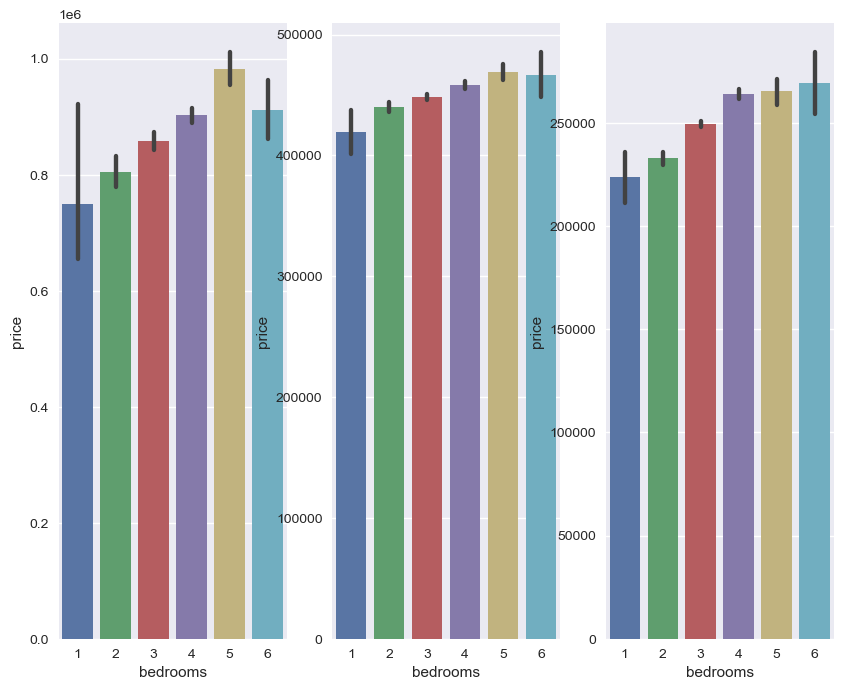

In [29]:
# plotting price against Bedrooms
#data
x = df['bedrooms']
y1 = high_prices
y2 = medium_prices
y3 = low_prices

# create figure
fig, ax = plt.subplots(ncols=3, figsize=(10,8), sharey=False)

# Bar plot
# High prices vs No. of bedrooms
sns.barplot(x=x, y=y1, ax=ax[0]);

# median price
sns.barplot(x=x, y=y2, ax=ax[1]);

# low price
sns.barplot(x=x, y=y3, ax=ax[2]);


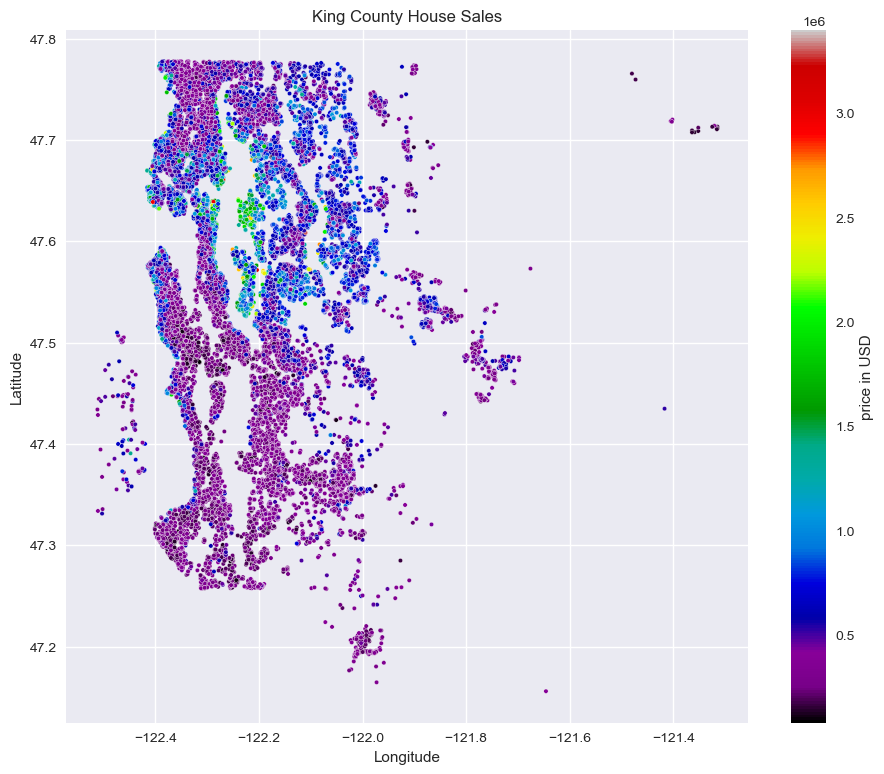

In [30]:
# Create a copy to manipulate
dfq2 = df.copy()

# Plot scatter plot
plt.figure(figsize = (11,9))
ax = sns.scatterplot(x = dfq2['long'], y = dfq2['lat'], hue = dfq2['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = dfq2)

norm = plt.Normalize(dfq2['price'].min(), dfq2['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County House Sales')
plt.show()

From this visualisation we can already draw initial insights based on the houses' geographical locations. The highest house prices are concentrated in the area with latitude around 47.6 and longitude around -122.25. There is a disparity with southern locations achieving lower house prices.

However there is no context to help us! We would need an underlying map to understand where the cities, highways, bodies of water etc. arelocated. It is difficult to draw meaningful conclusions with this visualisation alone.

Whilst we could define quadrants using the latitude and longitude, let us seek to plot the houses on a map instead.

Map of house sales
To visualise house sales on a map, we will use Bokeh and the built-in map tile from Carto DB. Note that Bokeh requires Mercator coordinates so we will need to convert our latitude and longitude values.

In [31]:
# Define coord as tuple (lat,long)
dfq2['coord'] = list(zip(dfq2['lat'], dfq2['long']))


# We will create new columns mercator_x and mercator_y to use in our plot.

# Obtain list of mercator coordinates using helper function
mercators = [x_coord(x, y) for x, y in dfq2['coord'] ]

# Create column mercator
dfq2['mercator'] = mercators

# Define columns mercator_x and mercator_y
dfq2[['mercator_x', 'mercator_y']] = dfq2['mercator'].apply(pd.Series)

# Preview relevant columns
dfq2[['zipcode', 'mercator_x', 'mercator_y', 'price']].head()

,zipcode,mercator_x,mercator_y,price
0,98178,-1.360959e+07,6.025918e+06,221900.0
1,98125,-1.361649e+07,6.060564e+06,538000.0
2,98028,-1.360692e+07,6.063361e+06,180000.0
3,98136,-1.362473e+07,6.027500e+06,604000.0
4,98074,-1.358599e+07,6.043339e+06,510000.0


In [32]:
# Our data is now in the correct format, let us create the map using Bokeh.
# We would like to display the price and zipcode when the user hovers over a data point, which is achieved using tooltips.
# House prices per Zipcode
# Explore zipcode
dfq2['zipcode'].value_counts()


98103    600
98115    582
98052    565
98038    553
98117    550
        ... 
98070     92
98010     84
98148     57
98024     51
98039     29
Name: zipcode, Length: 70, dtype: int64

There are 70 unique zipcodes represented in our dataset.

Let us create a heatmap to explore the median house price per zipcode and see if we can establish zipcode 'tiers'. We will make use of a geojson file showing the zip code boundaries and extract price and zipcode data from our dataset

In [33]:
# Extract price and zipcode from our dataset
dfrel = dfq2[['zipcode', 'price']]

# Groupby zipcode and take median price
dfrel = dfrel.groupby(dfrel['zipcode']).median()

# Reset index after groupy
dfrel = dfrel.reset_index()

# Change type to str
dfrel['zipcode'] = dfrel['zipcode'].astype(str)

# Rename column to match type
dfrel = dfrel.rename(columns = {'zipcode' : 'ZIPCODE'})

# Check
dfrel

,ZIPCODE,price
0,98001,259950.0
1,98002,235000.0
2,98003,265000.0
3,98004,1000000.0
4,98005,745000.0
...,...,...
65,98177,538000.0
66,98178,277554.0
67,98188,263000.0
68,98198,265000.0


In [34]:
# Get top 100 prices
dftop = dfq2.sort_values('price', ascending = False)[:100]

In [35]:
#import folium 
#from folium import plugins
#from folium.plugins import HeatMap 
# Plot with follium

# Create a base map by providing coordinates
#m = folium.Map(location = [47.5, -122.2])

# Add data for heatmap
#heat_data = dftop['coord']

# Add heatmap onto map
#HeatMap(heat_data).add_to(m)

# Show map
#m

We can also pinpoint these directly using the coordinates. To increase readability, we have chosen to only display the top 30 houses.

In [36]:
# Plot top 30 houses on map

# Create a base map by providing coordinates
#m = folium.Map(location = [47.5, -122.2])

# Add markers for houses
#for coordinates in dftop['coord'][:30]:
    #folium.Marker([coordinates[0], coordinates[1]], popup = coordinates).add_to(m)

# Show map
#m

#### Waterfront Feature
From the maps, it is apparent that being on the waterfront is highly sought after and many of the most expensive houses in our dataset have this feature. We have been provided with a waterfront feature, which characterises houses which have a view of a waterfront. Let us investigate how this feature relates to price by using a boxplot.

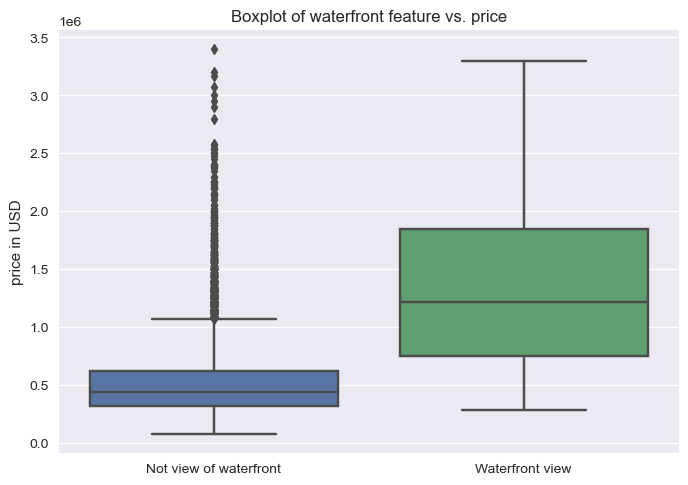

In [37]:
# Plot boxplot of waterfront feature
sns.boxplot(x = dfq2['waterfront'], y = dfq2['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Not view of waterfront', 'Waterfront view'))
plt.show()

In [38]:
waterfrontmean = dfq2[dfq2['waterfront'] == 1]['price'].mean()
nonwaterfrontmean = dfq2[dfq2['waterfront'] == 0]['price'].mean()
print(f"The mean house price for a house with waterfront view is USD {round(waterfrontmean,2)}")
print(f"The mean house price for a house without waterfront view is USD {round(nonwaterfrontmean,2)}")

The mean house price for a house with waterfront view is USD 1358787.5
The mean house price for a house without waterfront view is USD 506141.73


In [39]:
len(dfq2[dfq2['waterfront'] == 1])/len(dfq2)*100

0.5606031316450802

From this analysis we can see that most houses in King County have no waterfront.

However, the houses with waterfront have the highest prices.

## 4.0 Data Analysis

## 4.1 Seasons

In [40]:
# Define a dictionary to map month integers to month names
month_dict = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month from the date column and map to month names using the dictionary
df['month_sold'] = df['date'].dt.month.map(month_dict)

# define seasons based on months
seasons = {'Winter': ['December', 'January', 'February'],
           'Spring': ['March', 'April', 'May'],
           'Summer': ['June', 'July', 'August'],
           'Fall': ['September', 'October', 'November']}

# create a new 'season' column based on the 'month_sold' column
df['season'] = df['month_sold'].apply(lambda x: next((season for season, months in seasons.items() if x in months), None))
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_renovated,zipcode,lat,long,month_sold,year_sold,age,renovated,season
0,2014-10-13,221900.0,3,1,1180,5650,1.0,0,0,0,...,0.0,0.0,98178,47.5112,-122.257,October,2014,60,0,Fall
1,2014-12-09,538000.0,3,2,2570,7242,2.0,0,0,0,...,400.0,1991.0,98125,47.7210,-122.319,December,2014,64,0,Winter
2,2015-02-25,180000.0,2,1,770,10000,1.0,0,0,0,...,0.0,0.0,98028,47.7379,-122.233,February,2015,82,0,Winter
3,2014-12-09,604000.0,4,3,1960,5000,1.0,0,0,0,...,910.0,0.0,98136,47.5208,-122.393,December,2014,50,0,Winter
4,2015-02-18,510000.0,3,2,1680,8080,1.0,0,0,0,...,0.0,0.0,98074,47.6168,-122.045,February,2015,28,0,Winter


In [41]:
# Group by season and month_sold, and count the number of sales for each group
season_sales = df.groupby(['season', 'month_sold'])['price'].count()
# Find the season with the most sales

best_season = season_sales.groupby('season').max()

# Sort the seasons by total sales in descending order
best_season = best_season.sort_values(ascending=False)

# Print the season and corresponding months with the amount sold in each season
for season in best_season.index:
    months = ', '.join(seasons[season])
    sales = season_sales.loc[season]
    print(f"{season} ({months}): {sales.sum()} sales")
    print(sales)

Spring (March, April, May): 6246 sales
month_sold
April    2144
March    1813
May      2289
Name: price, dtype: int64
Summer (June, July, August): 6075 sales
month_sold
August    1866
July      2118
June      2091
Name: price, dtype: int64
Fall (September, October, November): 4829 sales
month_sold
November     1346
October      1785
September    1698
Name: price, dtype: int64
Winter (December, January, February): 3542 sales
month_sold
December    1403
February    1204
January      935
Name: price, dtype: int64


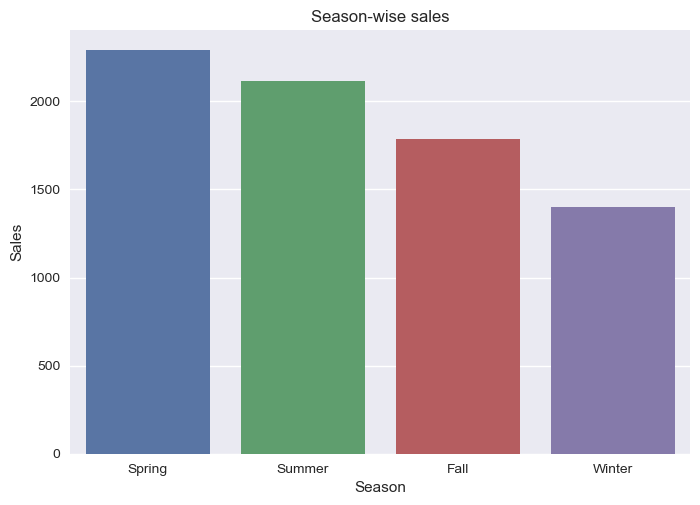

In [42]:
# Create a bar chart to show the sales for each season
sns.barplot(x=best_season.index, y=best_season.values)
plt.title('Season-wise sales')
plt.xlabel('Season')
plt.ylabel('Sales')
plt.show()

Looking at the sales data, we can see that the spring months of March, April, and May are the best for selling houses with a total of 6518 sales. This is likely due to the fact that Spring is a time of renewal and growth, and people may be more willing to make big changes such as buying a new home during this time. May is the most popular month for selling homes within Spring, with 2414 sales.

Summer, which comprises the months of June, July, and August, had a slightly lower total sales of 6328 compared to spring. July had the highest sales with 2211 followed by June with 2178 and 
August with 1939.

The fall season of September, October, and November had a total of 5056 sales, with October having the highest sales of 1876 followed by September with 1771 and November with 1409.

Lastly, the winter season of December, January, and February had the lowest total sales of 3695. December had the highest sales with 1470 followed by February with 1247 and January with 978. This may be due to the fact that Winter is a time when people tend to stay indoors and may be less inclined to go through the hassle of buying or selling a home.

Overall, it is important to note that this conclusion is based solely on the provided data and may not be reflective of larger trends in the housing market. Additionally, there may be some inaccuracies in the data such as missing or incomplete records, which could affect the accuracy of these findings.


## 4.2 Location

Location is key when it comes to real estate. Our second objective seeks to understand the geographical distribution of the homes in our dataset and determine where the highest house sales were recorded.

In [43]:
import plotly.graph_objs as go

# Define the map layout
layout = go.Layout(
    title='Housing Sales by Location',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        style='stamen-terrain',
        bearing=0,
        center=dict(
            lat=df['lat'].median(),
            lon=df['long'].median()
        ),
        pitch=0,
        zoom=10
    ),
)

# Define the map data as a scatter plot of the coordinates
data = go.Scattermapbox(
    lat=df['lat'],
    lon=df['long'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['price'],
        
        opacity=0.8
    ),
    text=['Price: ${}'.format(i) for i in df['price']],
    hovertext = df.apply(lambda x: f"Price: ${x['price']}, Waterfront: {x['waterfront']}", axis=1),
)

# Create the map figure and show it
fig = go.Figure(data=[data], layout=layout)
fig.show()

Based on the plotted graph, it is evident that a significant number of high-end residences are situated in the Bellevue area. The region comprises of a considerable size of uninhabitable mountainous terrain, which concentrates most of the housing in the towns. As a result, these towns appear to have a higher density of housing compared to the surrounding areas. 
Additionally, it is important to note that the plot may not be entirely accurate and there may be some data points that are not representative of the actual situation. For example, some properties may be incorrectly labeled as having waterfront access when they do not, which could affect their price and skew the distribution shown in the plot.
However, it is important to note that this statement is limited to the data presented in the plot and may not necessarily represent the overall distribution residences in the area. Further analysis and data may be required to make more conclusive observations.

## 4.3 Zip code

In [44]:
# Explore zipcode
df['zipcode'].value_counts()

98103    600
98115    582
98052    565
98038    553
98117    550
        ... 
98070     92
98010     84
98148     57
98024     51
98039     29
Name: zipcode, Length: 70, dtype: int64

There are 70 unique zipcodes represented in our dataset.

Let us create a heatmap to explore the median house price per zipcode and see if we can establish zipcode 'tiers'. We will make use of a geojson file showing the zip code boundaries and extract price and zipcode data from our dataset.

In [45]:
# Extract price and zipcode from our dataset
dfrel = df[['zipcode', 'price']]

# Groupby zipcode and take median price
dfrel = dfrel.groupby(dfrel['zipcode']).median()

# Reset index after groupy
dfrel = dfrel.reset_index()

# Change type to str
dfrel['zipcode'] = dfrel['zipcode'].astype(str)

# Rename column to match type
dfrel = dfrel.rename(columns = {'zipcode' : 'ZIPCODE'})

# Check
dfrel

,ZIPCODE,price
0,98001,259950.0
1,98002,235000.0
2,98003,265000.0
3,98004,1000000.0
4,98005,745000.0
...,...,...
65,98177,538000.0
66,98178,277554.0
67,98188,263000.0
68,98198,265000.0


From the above results, we can conclude that zip code do not directly affect house price since they varies with no uniformity.

X = df.drop(columns=['price'], axis=1)
for col in X.columns:
    fig, ax = plt.subplots(1, 1)
    sns.regplot(x=col, y='price', data=df, ax=ax)
    ax.set_title(col)
    plt.show()

## Test for Linearity Assumption

X = df.drop(columns=['price'], axis=1)
for col in X.columns:
    plt.subplots(1, 1)
    sns.regplot(X[col], df.price)
    plt.title(col)

## 5.1 Modeling

## Baseline Model Generation 

In [46]:
# Looking at correlations between other variables and price
df.corr(numeric_only=True)["price"]

price            1.000000
bedrooms         0.287461
bathrooms        0.440446
sqft_living      0.633164
sqft_lot         0.084227
floors           0.242786
waterfront       0.217516
view             0.384471
condition        0.384471
grade            0.384471
sqft_above       0.513823
sqft_basement    0.300752
yr_renovated     0.132620
zipcode         -0.016090
lat              0.365129
long            -0.006183
year_sold        0.013148
age             -0.009455
renovated        0.105561
Name: price, dtype: float64

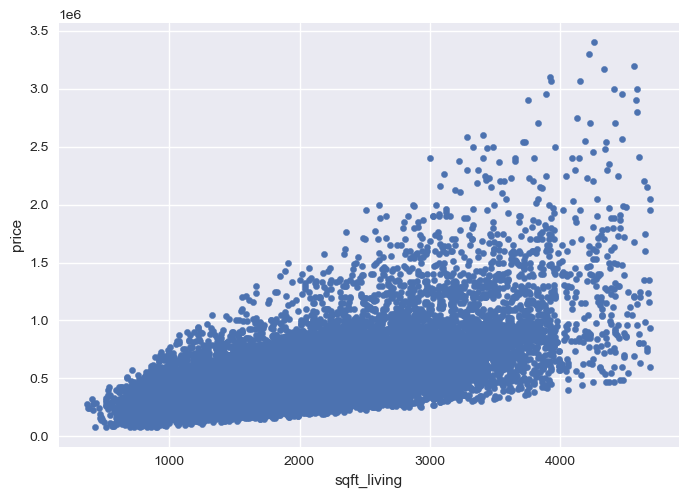

In [47]:
# Since Sqft_living is the feature with the strongest correlation in our dataset let's build our baseline model with that
df.plot.scatter(x="sqft_living", y="price");

There appears to be a fairly clear linear relationship between the Square footage of living space feature and price of a home in King County. We can use this to make a baseline model.

In [48]:
y = df["price"]
X_baseline = df[["sqft_living"]]

In [49]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.384e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:28:21   Log-Likelihood:            -2.8451e+05
No. Observations:               20692   AIC:                         5.690e+05
Df Residuals:                   20690   BIC:                         5.690e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         3.34e+04   4353.212      7.672      

In [50]:
# display model coefficients
baseline_results.params

const          33398.629651
sqft_living      239.445414
dtype: float64

### Baseline Model results

Looking at our summary above, our regression line is
$$ Price = 280 * sqft\_living - $43,988 $$

* The model is statistically significant as we can see, the p-value is below 0.05
* The model explains about 49%  of the variance in price looking at the R-Squared value which is 0.493
* The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
* If a house had a living space of 850 square feet , we would expect price to be about $194,000
* Generally speaking, as the living space of the house increases, so does the price of the house




### 5.2 Baseline Model visualization

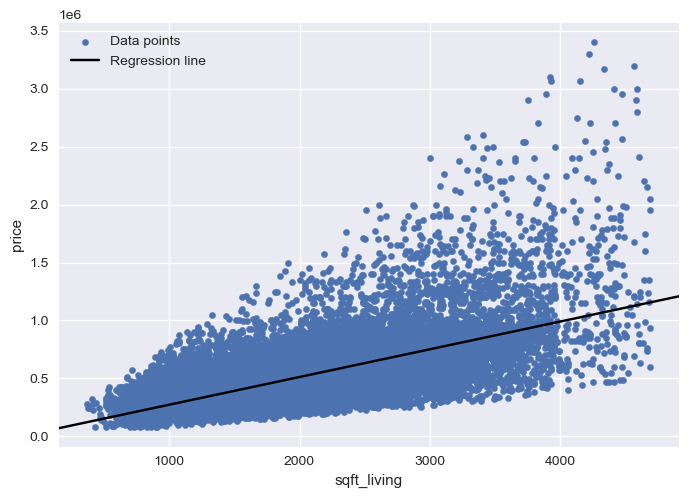

In [51]:
fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

Actions Points # check data types, separate date and month, then create a new column for date, month, and maybe season, autum, spring, winter, fall. 
Round off bathrooms to whole numbers since we cant have bathrooms as decimals
One-hot encode waterfront, view , grade, condition. 

In [52]:
fit_simple_linear_reg(df, 'price', 'sqft_living')


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.384e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:28:22   Log-Likelihood:            -2.8451e+05
No. Observations:               20692   AIC:                         5.690e+05
Df Residuals:                   20690   BIC:                         5.690e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         3.34e+04   4353.212      7.672      

In [53]:
## simple model --pn

# Multiple Linear Regression Model

In [54]:
predictor_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
fit_multiple_linear_reg(df, 'price', predictor_cols)


Training R^2: 0.4181203686680326
Test R^2: 0.41971099375276333


(LinearRegression(), 0.4181203686680326, 0.41971099375276333)

In [55]:
## multiple model --pn

In [56]:
y = df["price"]
X_multiple = df[["sqft_living", "bedrooms","bathrooms","sqft_lot","floors","sqft_above","yr_renovated"]]

In [57]:
mult_model = sm.OLS(y, sm.add_constant(X_multiple))
mult_results = mult_model.fit()

print(mult_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     2243.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:28:23   Log-Likelihood:            -2.8396e+05
No. Observations:               20692   AIC:                         5.679e+05
Df Residuals:                   20684   BIC:                         5.680e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.105e+05   7292.587     15.150   

In [58]:
predictor_cols = ['sqft_living']
degree = 2
fit_polynomial_reg(df, 'price', predictor_cols, degree)


Training R^2: 0.42402287530261273
Test R^2: 0.42608098091507596


(LinearRegression(), 0.42402287530261273, 0.42608098091507596)

## Model Valuation

In [59]:
## rmse ## metrics?